In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# http://archive.ics.uci.edu/ml/datasets/Letter+Recognition

In [2]:
os.listdir(".")

['.ipynb_checkpoints',
 'A-Z-Assighnment.ipynb',
 'Assignment#01.docx',
 'data.csv',
 'data_text.txt',
 'Index',
 'letter-recognition.data',
 'letter-recognition.names']

In [3]:
df = pd.read_csv("data.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [5]:
df[0].unique() # A to Z Capital Alphabets

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [6]:
len(df[0].unique())

26

In [7]:
df[0].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: 0, dtype: int64

In [8]:
labels = df[0]

In [9]:
features = df.drop(0, 1)

In [10]:
labels.head()

0    T
1    I
2    D
3    N
4    G
Name: 0, dtype: object

In [11]:
features.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [12]:
labels.shape

(20000,)

In [13]:
features.shape

(20000, 16)

In [14]:
labels.unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [15]:
labels = np.ravel(labels)
#print(labels)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#le.fit_transform(label,label)
labels = le.fit_transform(labels)
labels

array([19,  8,  3, ..., 19, 18,  0])

In [16]:
###############################3

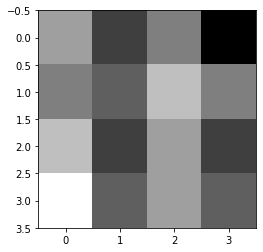

In [17]:
# viewing Picture
pic = 55
y = features.iloc[pic].values
z = y.reshape(4,4)
plt.imshow(z,cmap = plt.cm.binary)
plt.show()

In [18]:
features = features.values

In [19]:
# spliting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

In [20]:
x_train.shape[1] # input shape

16

In [21]:
y_train.shape

(16000,)

In [22]:
models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Dense(512,activation="relu",input_shape=(16,)),
                layers.Flatten(),
                layers.Dense(64,activation="relu"),
                layers.Dense(32,activation="relu"),
                layers.Dense(26, activation='softmax')])

model.compile(optimizer="adam", # adam # rmsprop
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(x_train,y_train,epochs=50,validation_split=(0.2))

Train on 12800 samples, validate on 3200 samples
Epoch 1/50
12800/12800 [==============================] - 3s 203us/sample - loss: 1.8597 - accuracy: 0.4626 - val_loss: 1.2233 - val_accuracy: 0.6309
Epoch 2/50
12800/12800 [==============================] - 1s 106us/sample - loss: 1.0223 - accuracy: 0.7007 - val_loss: 0.9203 - val_accuracy: 0.7231
Epoch 3/50
12800/12800 [==============================] - 1s 113us/sample - loss: 0.7933 - accuracy: 0.7651 - val_loss: 0.8237 - val_accuracy: 0.7437
Epoch 4/50
12800/12800 [==============================] - 1s 104us/sample - loss: 0.6737 - accuracy: 0.7951 - val_loss: 0.6859 - val_accuracy: 0.7925
Epoch 5/50
12800/12800 [==============================] - 1s 100us/sample - loss: 0.5867 - accuracy: 0.8213 - val_loss: 0.5701 - val_accuracy: 0.8353
Epoch 6/50
12800/12800 [==============================] - 1s 100us/sample - loss: 0.5292 - accuracy: 0.8345 - val_loss: 0.5317 - val_accuracy: 0.8397
Epoch 7/50
12800/12800 [===========================

In [23]:
evaluation = model.evaluate(x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

4000/1 - 0s - loss: 0.1173 - accuracy: 0.9335

Loss:  21.032731829583646 %
Accuracy:  93.34999918937683 %


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

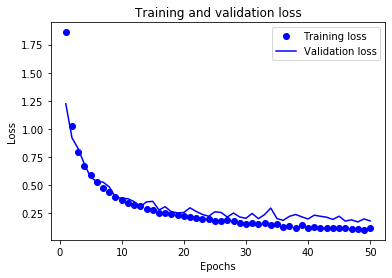

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

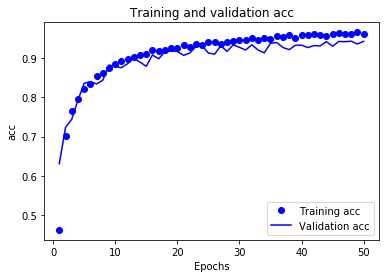

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [59]:
predict = 1
a = model.predict_classes(x_test)[predict]
print("Predicted value: ",a)
print("Actual value: ",y_test[0])

Predicted value:  3
Actual value:  3


#  Model

In [ ]:
"""models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Conv2D(16, (3, 3), activation='relu', input_shape=(30, 30, 3)),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(32, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Flatten(),
                #layers.Dense(512, activation='relu'),
                layers.Dense(26, activation='softmax')]) # sigmoid

model.summary()

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), #adam
              loss='categorical_crossentropy', # binary_crossentropy
              metrics=['accuracy'])"""